# Manipulate GTFS files

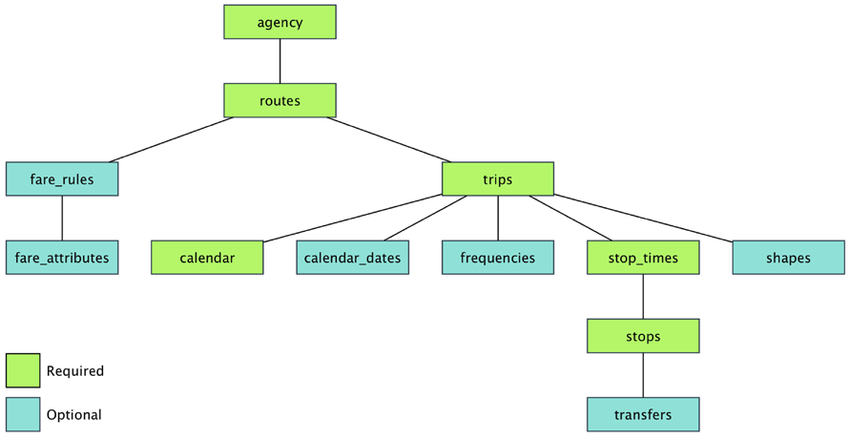
refs:  
1- https://gtfs.org  
2- https://github.com/Bondify/gtfs_functions/tree/master
3- https://medium.com/swlh/python-for-transit-get-the-most-out-of-your-gtfs-with-this-python-package-44d0b732f657  
4- https://medium.com/@mladen.dragicevic/real-time-gtfs-data-dashboard-in-python-209801ba32f1


In [18]:
from gtfs_functions import Feed

In [2]:
gtfs_path = '../data/TEC-GTFS.zip'

In [3]:
feed = Feed(gtfs_path)

In [4]:
routes = feed.routes
trips = feed.trips
stops = feed.stops
stop_times = feed.stop_times
shapes = feed.shapes

INFO:root:Reading "routes.txt".
INFO:root:accessing trips
INFO:root:Start date is None. You should either specify a start date or set busiest_date to True.
INFO:root:Reading "trips.txt".
INFO:root:Reading "calendar.txt".
INFO:root:Reading "calendar_dates.txt".
INFO:root:The busiest date/s of this feed or your selected date range is/are:  ['2024-12-25'] with 31753 trips.
INFO:root:In the case that more than one busiest date was found, the first one will be considered.
INFO:root:In this case is 2024-12-25.
INFO:root:Reading "stop_times.txt".
INFO:root:_trips is defined in stop_times
INFO:root:Reading "stops.txt".
INFO:root:computing patterns
INFO:root:Reading "shapes.txt".


In [5]:
feed = Feed(gtfs_path, time_windows=[0, 6 , 9, 15, 19, 22, 24])
stop_freq = feed.stops_freq

INFO:root:Reading "stop_times.txt".
INFO:root:get trips in stop_times
INFO:root:accessing trips
INFO:root:Reading "routes.txt".
INFO:root:Start date is None. You should either specify a start date or set busiest_date to True.
INFO:root:Reading "trips.txt".
INFO:root:Reading "calendar.txt".
INFO:root:Reading "calendar_dates.txt".
INFO:root:The busiest date/s of this feed or your selected date range is/are:  ['2024-12-25'] with 31753 trips.
INFO:root:In the case that more than one busiest date was found, the first one will be considered.
INFO:root:In this case is 2024-12-25.
INFO:root:Reading "stop_times.txt".
INFO:root:_trips is defined in stop_times
INFO:root:Reading "stops.txt".
INFO:root:computing patterns


In [6]:
stop_freq.query('stop_name.str.contains("Hyon")')

,stop_id,direction_id,window,ntrips,min_per_trip,stop_name,geometry
32914,H1ms293a,1,0:00-6:00,6,60,MONS Pavé d' Hyon,POINT (3.94645 50.44291)
32915,H1ms293a,1,15:00-19:00,62,3,MONS Pavé d' Hyon,POINT (3.94645 50.44291)
32916,H1ms293a,1,19:00-22:00,19,9,MONS Pavé d' Hyon,POINT (3.94645 50.44291)
32917,H1ms293a,1,22:00-24:00,2,60,MONS Pavé d' Hyon,POINT (3.94645 50.44291)
32918,H1ms293a,1,6:00-9:00,41,4,MONS Pavé d' Hyon,POINT (3.94645 50.44291)
32919,H1ms293a,1,9:00-15:00,93,3,MONS Pavé d' Hyon,POINT (3.94645 50.44291)
32920,H1ms293b,0,0:00-6:00,5,72,MONS Pavé d' Hyon,POINT (3.94670 50.44273)
32921,H1ms293b,0,15:00-19:00,78,3,MONS Pavé d' Hyon,POINT (3.94670 50.44273)
32922,H1ms293b,0,19:00-22:00,35,5,MONS Pavé d' Hyon,POINT (3.94670 50.44273)
32923,H1ms293b,0,6:00-9:00,65,2,MONS Pavé d' Hyon,POINT (3.94670 50.44273)


In [7]:
stop_freq.loc[stop_freq.stop_name=='MONS Pavé d\' Hyon'].sort_values(by=['direction_id', 'window'])

,stop_id,direction_id,window,ntrips,min_per_trip,stop_name,geometry
32920,H1ms293b,0,0:00-6:00,5,72,MONS Pavé d' Hyon,POINT (3.94670 50.44273)
32921,H1ms293b,0,15:00-19:00,78,3,MONS Pavé d' Hyon,POINT (3.94670 50.44273)
32922,H1ms293b,0,19:00-22:00,35,5,MONS Pavé d' Hyon,POINT (3.94670 50.44273)
32923,H1ms293b,0,6:00-9:00,65,2,MONS Pavé d' Hyon,POINT (3.94670 50.44273)
32924,H1ms293b,0,9:00-15:00,116,3,MONS Pavé d' Hyon,POINT (3.94670 50.44273)
32914,H1ms293a,1,0:00-6:00,6,60,MONS Pavé d' Hyon,POINT (3.94645 50.44291)
32915,H1ms293a,1,15:00-19:00,62,3,MONS Pavé d' Hyon,POINT (3.94645 50.44291)
32916,H1ms293a,1,19:00-22:00,19,9,MONS Pavé d' Hyon,POINT (3.94645 50.44291)
32917,H1ms293a,1,22:00-24:00,2,60,MONS Pavé d' Hyon,POINT (3.94645 50.44291)
32918,H1ms293a,1,6:00-9:00,41,4,MONS Pavé d' Hyon,POINT (3.94645 50.44291)


In [8]:
lines_freq = feed.lines_freq

INFO:root:Reading "shapes.txt".


In [9]:
lines_freq.query('route_name.str.contains("Hyon")')

,route_id,route_name,direction_id,window,min_per_trip,ntrips,geometry
1843,H1023-21661,23 Mons - Hyon - Asquillies,0,15:00-19:00,60,4,"LINESTRING (3.98421 50.36247, 3.98421 50.36248..."
1844,H1023-21661,23 Mons - Hyon - Asquillies,0,19:00-22:00,90,2,"LINESTRING (3.98421 50.36247, 3.98421 50.36248..."
1845,H1023-21661,23 Mons - Hyon - Asquillies,0,6:00-9:00,180,1,"LINESTRING (3.98421 50.36247, 3.98421 50.36248..."
1846,H1023-21661,23 Mons - Hyon - Asquillies,0,9:00-15:00,180,2,"LINESTRING (3.98421 50.36247, 3.98421 50.36248..."
1847,H1023-21661,23 Mons - Hyon - Asquillies,1,15:00-19:00,120,2,"LINESTRING (3.94140 50.45292, 3.94120 50.45269..."
1848,H1023-21661,23 Mons - Hyon - Asquillies,1,9:00-15:00,60,6,"LINESTRING (3.94140 50.45292, 3.94120 50.45269..."
1849,H1023-21661,23 Mons - Hyon - Asquillies,0,0:00-6:00,180,2,"LINESTRING (3.98421 50.36247, 3.98421 50.36248..."
1850,H1023-21661,23 Mons - Hyon - Asquillies,0,6:00-9:00,180,1,"LINESTRING (3.98421 50.36247, 3.98421 50.36248..."
1851,H1023-21661,23 Mons - Hyon - Asquillies,0,9:00-15:00,180,2,"LINESTRING (3.98421 50.36247, 3.98421 50.36248..."
1852,H1023-21661,23 Mons - Hyon - Asquillies,0,9:00-15:00,90,4,"LINESTRING (3.94335 50.41904, 3.94349 50.41913..."


In [10]:
lines_freq.loc[lines_freq.route_name=='23 Mons - Hyon - Asquillies'].sort_values(by=['direction_id', 'window'])

,route_id,route_name,direction_id,window,min_per_trip,ntrips,geometry
1849,H1023-21661,23 Mons - Hyon - Asquillies,0,0:00-6:00,180,2,"LINESTRING (3.98421 50.36247, 3.98421 50.36248..."
1843,H1023-21661,23 Mons - Hyon - Asquillies,0,15:00-19:00,60,4,"LINESTRING (3.98421 50.36247, 3.98421 50.36248..."
1844,H1023-21661,23 Mons - Hyon - Asquillies,0,19:00-22:00,90,2,"LINESTRING (3.98421 50.36247, 3.98421 50.36248..."
1845,H1023-21661,23 Mons - Hyon - Asquillies,0,6:00-9:00,180,1,"LINESTRING (3.98421 50.36247, 3.98421 50.36248..."
1850,H1023-21661,23 Mons - Hyon - Asquillies,0,6:00-9:00,180,1,"LINESTRING (3.98421 50.36247, 3.98421 50.36248..."
1853,H1023-21661,23 Mons - Hyon - Asquillies,0,6:00-9:00,180,1,"LINESTRING (3.95136 50.42051, 3.95146 50.42059..."
1854,H1023-21661,23 Mons - Hyon - Asquillies,0,6:00-9:00,180,1,"LINESTRING (3.91956 50.39199, 3.91978 50.39185..."
1846,H1023-21661,23 Mons - Hyon - Asquillies,0,9:00-15:00,180,2,"LINESTRING (3.98421 50.36247, 3.98421 50.36248..."
1851,H1023-21661,23 Mons - Hyon - Asquillies,0,9:00-15:00,180,2,"LINESTRING (3.98421 50.36247, 3.98421 50.36248..."
1852,H1023-21661,23 Mons - Hyon - Asquillies,0,9:00-15:00,90,4,"LINESTRING (3.94335 50.41904, 3.94349 50.41913..."


In [13]:
lines_freq.loc[lines_freq.route_name=='23 Mons - Hyon - Asquillies'].explore()

In [14]:
segments = feed.segments

INFO:root:Getting segments...
INFO:root:Projecting stops onto shape...
INFO:root:Interpolating stops onto shape...
INFO:root:Sorting shape points and stops...
INFO:root:segments_df: 137300, geometry: 137300


In [15]:
speeds = feed.avg_speeds

INFO:root:adding runtime
INFO:root:adding distance in meters
INFO:root:calculating speed in km/h
INFO:root:fixing outliers
INFO:root:aggregating speed by segment and window


In [19]:
segments.query('route_name.str.contains("Hyon")')

,shape_id,route_id,route_name,direction_id,stop_sequence,segment_name,start_stop_name,end_stop_name,segment_id,start_stop_id,end_stop_id,distance_m,geometry
25064,H10230044,H1023-21661,23 Mons - Hyon - Asquillies,0,1,HAVAY Place - HAVAY Rue Derrière les Haies,HAVAY Place,HAVAY Rue Derrière les Haies,H1hy128a - H1hy130b,H1hy128a,H1hy130b,1669.038839,"LINESTRING (3.98422 50.36248, 3.98438 50.36272..."
25065,H10230044,H1023-21661,23 Mons - Hyon - Asquillies,0,2,HAVAY Rue Derrière les Haies - HAVAY La Rose,HAVAY Rue Derrière les Haies,HAVAY La Rose,H1hy130b - H1hy127b,H1hy130b,H1hy127b,469.748501,"LINESTRING (3.98115 50.36086, 3.98115 50.36086..."
25066,H10230044,H1023-21661,23 Mons - Hyon - Asquillies,0,3,HAVAY La Rose - QUEVY Route d'Havay,HAVAY La Rose,QUEVY Route d'Havay,H1hy127b - H1qy135b,H1hy127b,H1qy135b,641.202251,"LINESTRING (3.97478 50.36195, 3.97477 50.36196..."
25067,H10230044,H1023-21661,23 Mons - Hyon - Asquillies,0,4,QUEVY Route d'Havay - HAVAY Rue de Maubeuge - ...,QUEVY Route d'Havay,HAVAY Rue de Maubeuge - Habitation n°48,H1qy135b - H1hy144a,H1qy135b,H1hy144a,390.748533,"LINESTRING (3.96815 50.36558, 3.96813 50.36559..."
25068,H10230044,H1023-21661,23 Mons - Hyon - Asquillies,0,5,HAVAY Rue de Maubeuge - Habitation n°48 - HAVA...,HAVAY Rue de Maubeuge - Habitation n°48,"HAVAY Route de Maubeuge, 46",H1hy144a - H1hy129a,H1hy144a,H1hy129a,412.107662,"LINESTRING (3.96728 50.36322, 3.96721 50.36209..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35362,H18010007,H1801-21652,CityO Mons centre-ville - Hyon,0,17,MONS Hôpital St-Joseph - MONS Rue d'Havré,MONS Hôpital St-Joseph,MONS Rue d'Havré,H1ms364a - H1ms910a,H1ms364a,H1ms910a,277.079867,"LINESTRING (3.96050 50.45389, 3.96049 50.45389..."
35363,H18010007,H1801-21652,CityO Mons centre-ville - Hyon,0,18,MONS Rue d'Havré - MONS Hautbois,MONS Rue d'Havré,MONS Hautbois,H1ms910a - H1ms911a,H1ms910a,H1ms911a,57.505271,"LINESTRING (3.95665 50.45389, 3.95640 50.45386..."
35364,H18010007,H1801-21652,CityO Mons centre-ville - Hyon,0,19,MONS Hautbois - MONS Grand-Place,MONS Hautbois,MONS Grand-Place,H1ms911a - H1ms912a,H1ms911a,H1ms912a,221.054510,"LINESTRING (3.95586 50.45378, 3.95585 50.45378..."
35365,H18010007,H1801-21652,CityO Mons centre-ville - Hyon,0,20,MONS Grand-Place - MONS Clercs,MONS Grand-Place,MONS Clercs,H1ms912a - H1ms915b,H1ms912a,H1ms915b,231.659851,"LINESTRING (3.95277 50.45387, 3.95277 50.45387..."


In [28]:
speeds.loc[(speeds.segment_id=='H1hy128a - H1hy130b')&(speeds.window=='6:00-9:00')&(speeds.direction_id==0)]

,route_id,route_name,direction_id,stop_sequence,segment_name,window,speed_kmh,avg_route_speed_kmh,segment_max_speed_kmh,runtime_sec,start_stop_name,end_stop_name,segment_id,start_stop_id,end_stop_id,shape_id,distance_m,geometry
100723,H1023-21661,23 Mons - Hyon - Asquillies,0,1,HAVAY Place - HAVAY Rue Derrière les Haies,6:00-9:00,50.0,26.5,50.0,120.0,HAVAY Place,HAVAY Rue Derrière les Haies,H1hy128a - H1hy130b,H1hy128a,H1hy130b,H10230044,1669.038839,"LINESTRING (3.98422 50.36248, 3.98438 50.36272..."
100724,H1023-21661,23 Mons - Hyon - Asquillies,0,1,HAVAY Place - HAVAY Rue Derrière les Haies,6:00-9:00,50.0,26.5,50.0,120.0,HAVAY Place,HAVAY Rue Derrière les Haies,H1hy128a - H1hy130b,H1hy128a,H1hy130b,H10230046,1669.038839,"LINESTRING (3.98422 50.36248, 3.98438 50.36272..."


In [29]:
seg_freq = feed.segments_freq

INFO:root:adding data for all lines.


In [33]:
seg_freq.loc[(seg_freq.segment_id=='H1hy128a - H1hy130b')&(seg_freq.window=='6:00-9:00')]

,route_id,route_name,direction_id,segment_name,start_stop_name,end_stop_name,window,min_per_trip,ntrips,start_stop_id,end_stop_id,segment_id,geometry
43283,H1023-21661,23 Mons - Hyon - Asquillies,0,HAVAY Place - HAVAY Rue Derrière les Haies,HAVAY Place,HAVAY Rue Derrière les Haies,6:00-9:00,90,2,H1hy128a,H1hy130b,H1hy128a - H1hy130b,"LINESTRING (3.98422 50.36248, 3.98438 50.36272..."
222082,ALL_LINES,All lines,NA,HAVAY Place - HAVAY Rue Derrière les Haies,HAVAY Place,HAVAY Rue Derrière les Haies,6:00-9:00,90,2,H1hy128a,H1hy130b,H1hy128a - H1hy130b,"LINESTRING (3.98422 50.36248, 3.98438 50.36272..."


In [34]:
import keplergl as kp

In [ ]:
kp.